In [62]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [63]:
df=pd.read_csv("bank-additional-full.csv",delimiter=';')

In [64]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [65]:
df.shape

(41188, 21)

In [66]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [67]:
label_encoding_columns=["job","education","month","day_of_week","poutcome","y"]
onehot_encoding_columns=["marital","default","housing","loan","contact"]

In [68]:
df[label_encoding_columns] = df[label_encoding_columns].apply(LabelEncoder().fit_transform)
df = pd.get_dummies(df, columns=onehot_encoding_columns)

In [69]:
df.shape

(41188, 31)

In [70]:
df.head()

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,poutcome,...,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone
0,56,3,0,6,1,261,1,999,0,1,...,0,0,1,0,0,1,0,0,0,1
1,57,7,3,6,1,149,1,999,0,1,...,1,0,1,0,0,1,0,0,0,1
2,37,7,3,6,1,226,1,999,0,1,...,0,0,0,0,1,1,0,0,0,1
3,40,0,1,6,1,151,1,999,0,1,...,0,0,1,0,0,1,0,0,0,1
4,56,7,3,6,1,307,1,999,0,1,...,0,0,1,0,0,0,0,1,0,1


In [71]:
df.drop("duration",axis=1,inplace=True)

In [72]:
df.columns

Index(['age', 'job', 'education', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'marital_divorced',
       'marital_married', 'marital_single', 'marital_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone'],
      dtype='object')

In [73]:
# df.drop(["marital_unknown","default_unknown","housing_unknown","loan_unknown"],axis=1,inplace=True)

In [74]:
df.shape

(41188, 30)

In [75]:
df.isnull().sum()

age                  0
job                  0
education            0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
marital_divorced     0
marital_married      0
marital_single       0
marital_unknown      0
default_no           0
default_unknown      0
default_yes          0
housing_no           0
housing_unknown      0
housing_yes          0
loan_no              0
loan_unknown         0
loan_yes             0
contact_cellular     0
contact_telephone    0
dtype: int64

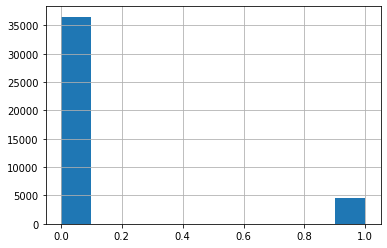

In [76]:
df.y.hist()

In [77]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [78]:
X = df[df.columns[df.columns!='y']].values
y = df['y'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50, 
                               stratify=y)

In [80]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3)
scores = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring="f1_macro")  # cross-validation
print("F1-macro: %.2f +/- %.2f" % (scores.mean(), scores.std()))

F-1 macro: 0.61 +/- 0.02


In [81]:
from sklearn.metrics import f1_score

In [91]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)
print("Dummy F1-macro: %.2f" % f1_score(y_train, dummy_clf.predict(X_train),average="macro"))

Dummy F1-macro: 0.50


In [83]:
param_grid = { 
    'n_estimators': [50,100,150,200,250,300,350,400], 
    'max_features': ['auto'],
    'max_depth' : [5,10,15,20,25,30],
    'criterion' :['gini', 'entropy']
}
grid_search = GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2,scoring="f1_macro")

In [84]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 250}

In [92]:
rf_clf = RandomForestClassifier(n_estimators=250, max_depth=20,max_features='auto',criterion="entropy")
scores = cross_val_score(rf_clf, X_train, y_train, cv=10, scoring="f1_macro")  # cross-validation
print("F1-macro: %.2f +/- %.2f" % (scores.mean(), scores.std()))

F1-macro: 0.67 +/- 0.02


In [93]:
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

In [94]:
print(confusion_matrix(y_test,y_pred))
print()
print(f1_score(y_test, y_pred,average="macro"))

[[7106  204]
 [ 648  280]]

0.6700209418097515


In [95]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.97      0.94      7310\n           1       0.58      0.30      0.40       928\n\n    accuracy                           0.90      8238\n   macro avg       0.75      0.64      0.67      8238\nweighted avg       0.88      0.90      0.88      8238\n'

In [96]:
features=df.columns[df.columns!='y']

[ 0 12  1  5  2 13  4  9  6 11  8 10  3  7 21 23 15 16 24 26 14 27 28 19
 18 25 22 17 20]
Feature ranking:
1. age (0.149025)
2. euribor3m (0.144646)
3. job (0.077999)
4. campaign (0.076495)
5. education (0.070582)
6. nr.employed (0.065794)
7. day_of_week (0.060446)
8. emp.var.rate (0.037158)
9. pdays (0.035382)
10. cons.conf.idx (0.032972)
11. poutcome (0.031036)
12. cons.price.idx (0.029601)
13. month (0.022385)
14. previous (0.018694)
15. housing_no (0.018321)
16. housing_yes (0.018009)
17. marital_married (0.016004)
18. marital_single (0.014367)
19. loan_no (0.013896)
20. loan_yes (0.013209)
21. marital_divorced (0.010765)
22. contact_cellular (0.009860)
23. contact_telephone (0.009416)
24. default_unknown (0.008676)
25. default_no (0.008182)
26. loan_unknown (0.003063)
27. housing_unknown (0.003040)
28. marital_unknown (0.000974)
29. default_yes (0.000002)


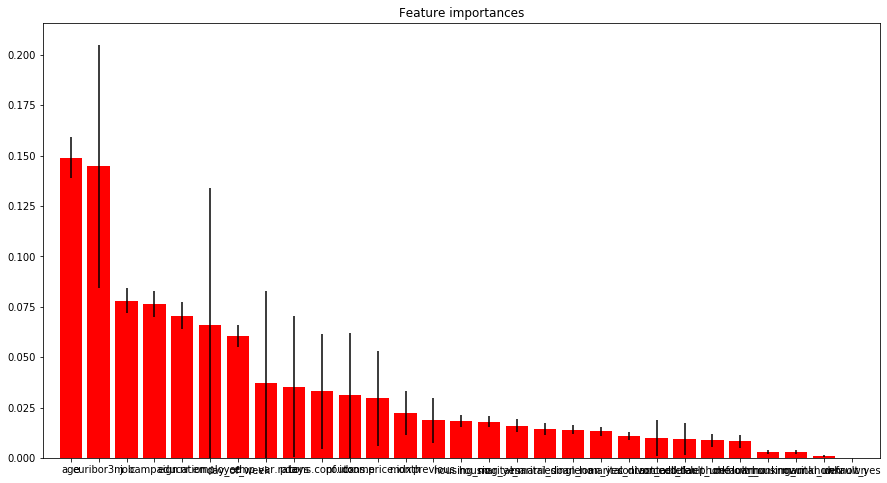

In [97]:
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)
